# Modelo de regresión logística para *"Car Evaluation"*


## Objetivos

> **Objetivo general:**
> - Implementar el modelo de regresión logística Bayesiana usando PyMC para nuestro particular problema de evaluaión de carros.

> **Objetivos específicos:**
>
> - Usar el modelo para evaluar un carro entre las siguientes categorias: inaceptable, aceptable, bueno, muy bueno, en función de las variables que tenemos sobre el carro (precio de compra, mantenimiento, número de puertas, capacidad de personas, tamaño del maletero y sseguridad).

> - Definir cuáles serán las entradas y salidas del modelo que clasifique correctamente, reconocer sus limitaciones y definir el modelo en un lenguaje probabilístico. 

> **Referencias:**
> - URL del repositorio: 'https://archive.ics.uci.edu/dataset/19/car+evaluation

## Descripción del problema 


Car Evaluation Database se derivó de un modelo de decisión jerárquica simple desarrollado originalmente para la demostración de DEX, M. Bohanec, V. Rajkovic: Sistema experto para la toma de decisiones. (Sistémica 1(1), pp. 145-157, 1990.). 

Se quiere encontrar cómo evaluar los carros. Para esto tenemos datos de autos(s) previamente clasificado(s) que se espera que analicemos para reconocer patrones que nos ayuden a encontar un modelo que nos diga con exactitud si tenemos un buen carro o un mal carro.

El modelo evalúa los coches de acuerdo con la siguiente estructura conceptual y contiene ejemplos con información estructural eliminada, es decir, relacionada directamente con los seis atriburos de entra:

- **CLASS**: Evaluación del carro. Unacc, acc, good, vgood, (unacceptable, acceptable, good, very good). 
- **BUYING**: Precio de compra. Vhigh (Verry High), high, med, low. 
- **MAINT**: Precio del mantenimiento. Vhigh, high, med, low.
- **DOORS**: Número de puertas. 2, 3, 4, 5more (5 or more). 
- **PERSONS**: Capacidad de personas. 2, 3, 4, more.
- **LUG_BOOT**: Tamaño del maletero. Small, med, big.
- **SAFETY**: Seguridad estimada. Low, med, big.




In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

car_evaluation = fetch_ucirepo(id=19)

df = pd.DataFrame(car_evaluation.data.features)
df['class'] = car_evaluation.data.targets  

print(df.sample(10))
  
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  



     buying  maint  doors persons lug_boot safety  class
1424    low   high      2    more    small   high  unacc
1482    low   high      4    more      big    low  unacc
1199    med    low      2       4    small   high   good
1121    med    med      3       4      med   high    acc
1015    med   high      3       4      big    med    acc
1494    low   high  5more       4    small    low  unacc
786    high    low      3       2      med    low  unacc
1287    med    low  5more    more    small    low  unacc
1382    low  vhigh  5more       2      med   high  unacc
1156    med    med      4    more      med    med    acc


In [2]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [3]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [4]:
import numpy as np
if df.select_dtypes(include=np.number).empty:
    print("No hay datos numéricos en el DataFrame.")
else:
    print(df.describe(include="number"))

No hay datos numéricos en el DataFrame.


In [5]:
# Descripción de columnas categóricas
df.describe(include="object")

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
df.shape

(1728, 7)

## Análisis exploratorio de datos

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2


In [8]:
X.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [9]:
y.isna().sum()

class    0
dtype: int64

In [10]:
y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: xlabel='class'>

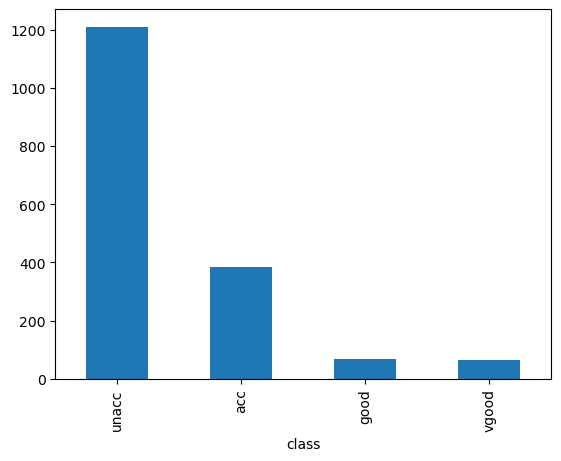

In [11]:
df["class"].value_counts().plot(kind="bar")

In [12]:
#División temportal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='class'>

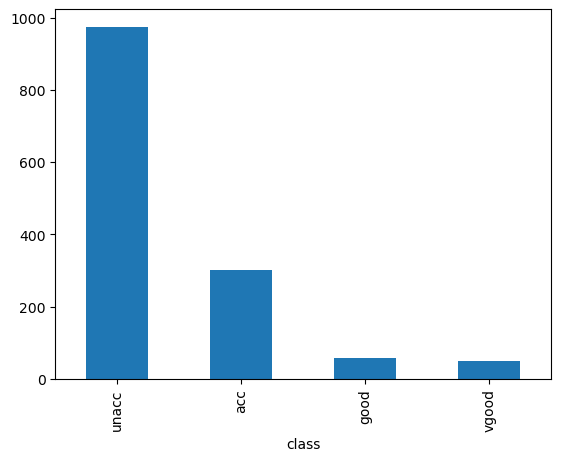

In [13]:
y_train["class"].value_counts().plot(kind="bar")

<Axes: xlabel='class'>

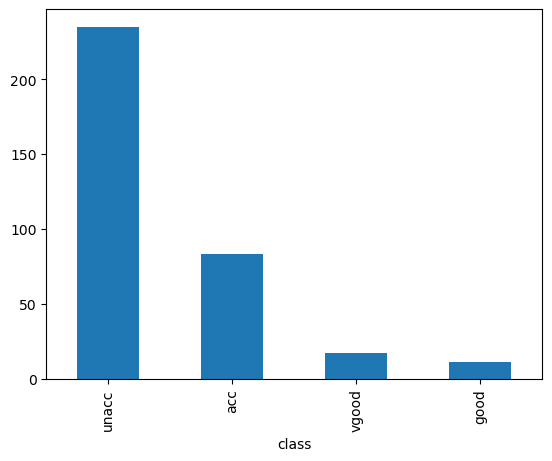

In [14]:
y_test["class"].value_counts().plot(kind="bar")

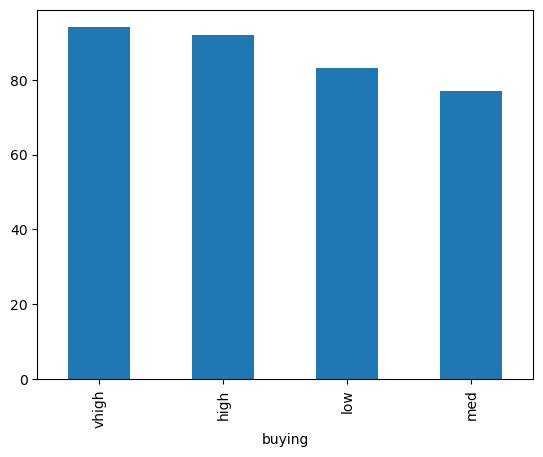

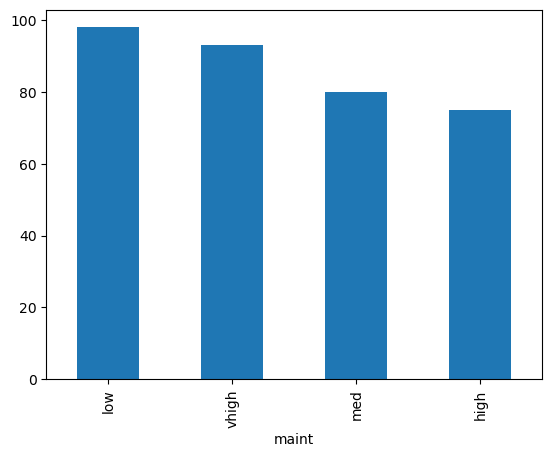

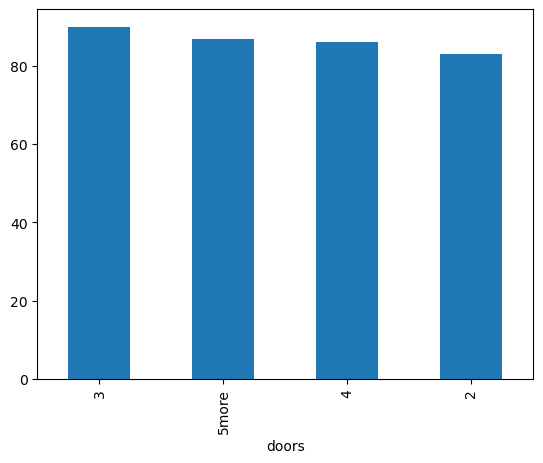

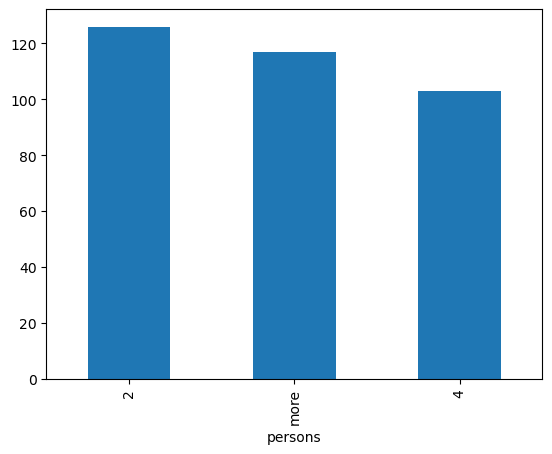

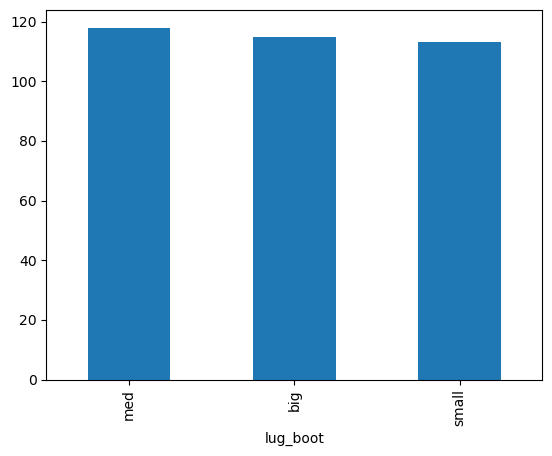

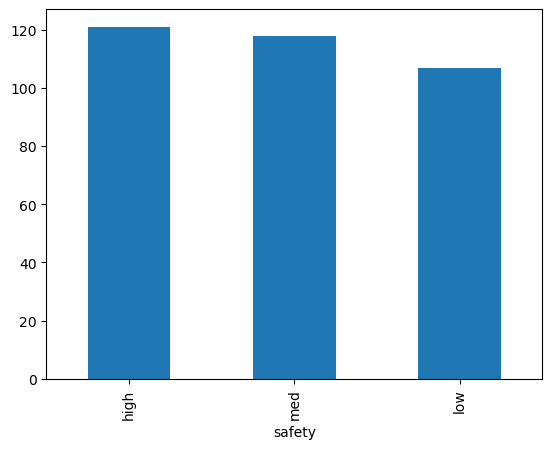

In [15]:
columnas = X_test.columns

for i in columnas:
    grafica =X_test[i].value_counts().plot(kind="bar")
    plt.show()

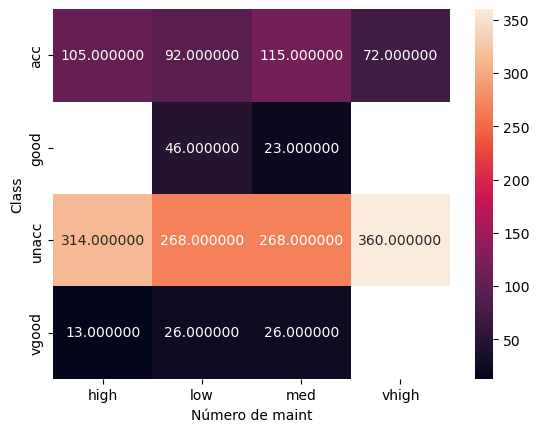

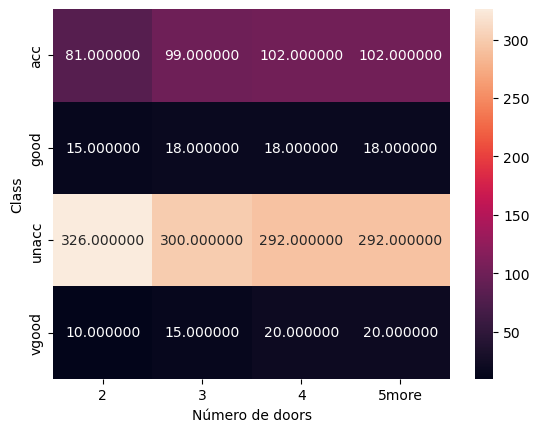

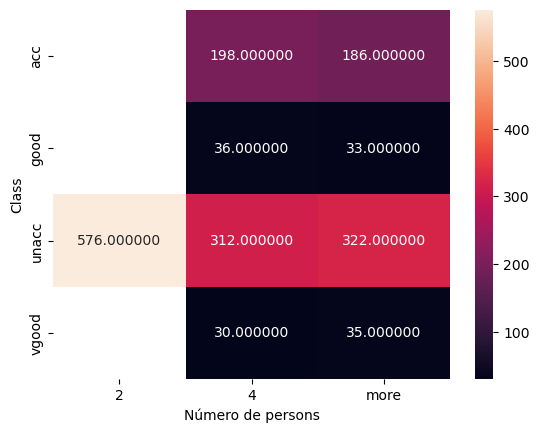

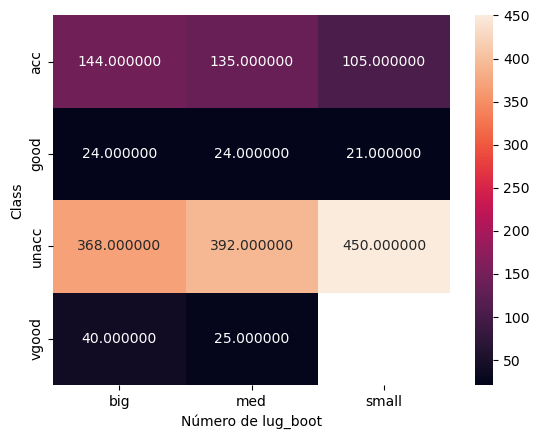

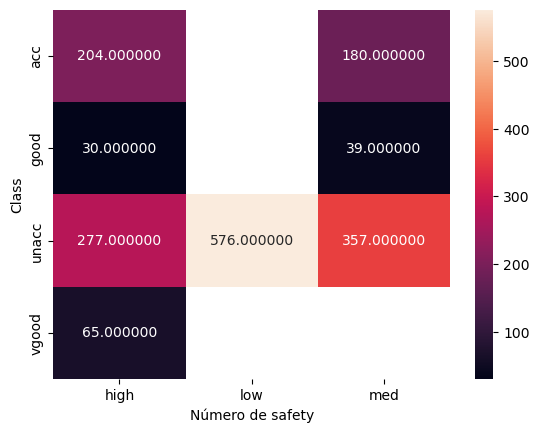

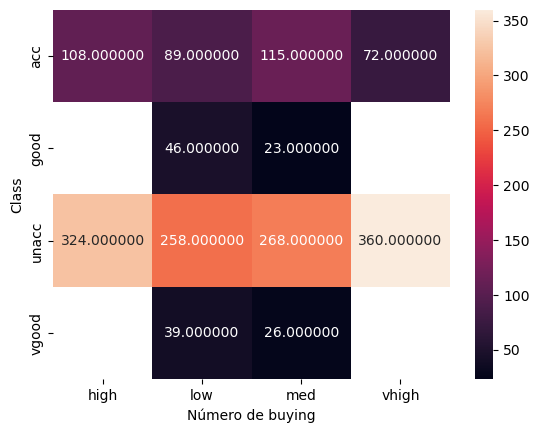

In [16]:
# Conteos de las diferentes categorías de las columnas categóricas, agrupado por la columna "deposit"
for col in df.select_dtypes(include="object"):
    if col != "class":
        if col != 'buying':
            pivot_table = df.pivot_table(index='class', columns=col, values='buying', aggfunc='count')
            sns.heatmap(pivot_table, annot=True, fmt = "f")
            plt.xlabel(f'Número de {col}')
            plt.ylabel('Class')
            plt.show()

pivot_table = df.pivot_table(index='class', columns='buying', values='maint', aggfunc='count')
sns.heatmap(pivot_table, annot=True, fmt = "f")
plt.xlabel('Número de buying')
plt.ylabel('Class')
plt.show()


### Encoding

In [17]:

column_mappings = {
    "safety": {'low': 0.5, 'med': 0.75, 'high': 1},
    "lug_boot": {'small': 0.5, 'med': 0.75, 'big': 1},
    "persons": {'2': 0.5, '4': 0.75, 'more': 1}
}
def handle_mapping_errors(col, mapping, i):
    # Identificar valores únicos no mapeados
    unique_values = set(i[col]) - set(mapping.keys())
    print(f"Valores únicos no mapeados en {col}: {unique_values}")
    mapping.update({value: -1 for value in unique_values})
    return mapping

# Aplicar el mapeo a los DataFrames
for col, mapping in column_mappings.items():
    try:
        mapping = handle_mapping_errors(col, mapping, X)
        X[col] = X[col].map(mapping)
    except Exception as e:
        print(f"Error en la columna {col}: {e}")


Valores únicos no mapeados en safety: set()
Valores únicos no mapeados en lug_boot: set()
Valores únicos no mapeados en persons: set()


C:\Users\esteb\AppData\Local\Temp\ipykernel_11348\1292592378.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(mapping)
C:\Users\esteb\AppData\Local\Temp\ipykernel_11348\1292592378.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(mapping)
C:\Users\esteb\AppData\Local\Temp\ipykernel_11348\1292592378.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [18]:

column_mappings = {
    "buying": {'low': 0.25, 'med': 0.5, 'high': 0.75, 'vhigh':1},
    "doors": {'2': 0.25, '3': 0.5, '4': 0.75, '5more':1},
    "maint": {'low': 0.25, 'med': 0.5, 'high': 0.75, 'vhigh':1}
}
def handle_mapping_errors(col, mapping, i):
    unique_values = set(i[col]) - set(mapping.keys())
    print(f"Valores únicos no mapeados en {col}: {unique_values}")
    mapping.update({value: -1 for value in unique_values})
    return mapping

for col, mapping in column_mappings.items():
    try:
        mapping = handle_mapping_errors(col, mapping, X)
        X[col] = X[col].map(mapping)
    except Exception as e:
        print(f"Error en la columna {col}: {e}")


Valores únicos no mapeados en buying: set()
Valores únicos no mapeados en doors: set()
Valores únicos no mapeados en maint: set()


C:\Users\esteb\AppData\Local\Temp\ipykernel_11348\818666348.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(mapping)
C:\Users\esteb\AppData\Local\Temp\ipykernel_11348\818666348.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].map(mapping)
C:\Users\esteb\AppData\Local\Temp\ipykernel_11348\818666348.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [19]:
#División final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_test

,buying,maint,doors,persons,lug_boot,safety
599,0.75,0.75,0.75,0.50,0.75,1.00
1201,0.50,0.25,0.25,0.75,0.75,0.75
628,0.75,0.75,1.00,0.50,1.00,0.75
1498,0.25,0.75,1.00,0.75,0.75,0.75
1263,0.50,0.25,0.75,1.00,0.75,0.50
...,...,...,...,...,...,...
100,1.00,1.00,1.00,1.00,0.50,0.75
274,1.00,0.50,0.75,0.50,0.75,0.75
1206,0.50,0.25,0.25,1.00,0.50,0.50
101,1.00,1.00,1.00,1.00,0.50,1.00


### Cálculo de chi2 score para selección de variables

In [21]:
# Diccionario de mapeo
mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

y_train_mapped = []
for value in y_train['class']:
    y_train_mapped.append(mapping[value])

y_train_encoded = y_train['class'].apply(lambda x: mapping[x])
y_test_encoded = y_test['class'].apply(lambda x: mapping[x])


chi2_selector = SelectKBest(chi2, k='all')  
X_train_new = chi2_selector.fit_transform(X_train, y_train_encoded)

scores = pd.DataFrame(
    chi2_selector.scores_,
    index=X_train.columns,
    columns=['Chi2 Score']
)
scores = scores.sort_values(by='Chi2 Score', ascending=False)
print(scores)

X_test_new = chi2_selector.transform(X_test)

          Chi2 Score
safety     17.911721
buying     14.944186
maint      12.803618
persons    10.940596
lug_boot    2.587802
doors       1.242324


In [22]:
y_encoded = np.concatenate((y_train_encoded, y_test_encoded), axis=0)


### Conclusiones

Las caracteristicas que mejor describen la variable a predeir parecen ser safety, buying y maint, según el chi2 score.Se corrobora en los heatmaps: cuando el precio en el que se compró fue alto, no se considera un muy buen carro, por lo caro, también entre más seguro es mejor el carro y el a requerir mayor mantenimiento o gastos en eso, se considera menos bueno. 

## Regresor Logístico Bayesiano


$$
class_i \sim \text{Bernoulli}(p_i).
$$

La probabilidad, es la que dependerá de los predictores ("buying", "safety" y "maint"). Sabemos que la probabilidad debe de estar entre 0 y 1 (siendo 0 inaceptable el carro y 1 el mejor), por lo que usamos la función logit para asegurar esto:

$$
\text{logit}(p_i) = \log \frac{p_i}{1 - p_i}.
$$

Es sobre $\text{logit}(p_i)$ que definimos un modelo lineal de los predictores:

$$
\text{logit}(p_i) = \alpha + \beta_{buying}buying_i + \beta_{maint}maint_i + \beta_{safaty}safaty_i.
$$

Para los parámetros $\alpha$, $\beta_{buying}$, $\beta_{maint}$, y $\beta_{safaty}$ definimos previas. El modelo queda como sigue:

$$
\begin{align}
\begin{array}{lcl}
class_i & \sim & \text{Bernoulli}(p_i) \\
\text{logit}(p_i) & = & \alpha + \beta_{balance}balance_i + \beta_{safety}safety_i + \beta_{maint}maint_i \\
\alpha & \sim & \text{Normal}(0, 1) \\
\beta_{buying} & \sim & \text{Normal}(11.522, 1/4) \\
\beta_{safety} & \sim & \text{Normal}(11.55, 1/4) \\
\beta_{maint} & \sim & \text{Normal}(11.55, 1/4) \\
\end{array}
\end{align}
$$

### Simulación predictiva previa 

In [23]:
# Importar pymc
import pymc as pm
# Importar arviz
import arviz as az
# Importar numpy
import numpy as np

##### Nueva definición del df

In [24]:
import pandas as pd
y_class_encoded = pd.Series(y_encoded, name='class')# Suponiendo que X es un DataFrame y y_encoded es una Serie de Pandas
df = pd.concat([X, y_class_encoded], axis=1)

In [25]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,1.00,1.00,0.25,0.5,0.50,0.50,0
1,1.00,1.00,0.25,0.5,0.50,0.75,0
2,1.00,1.00,0.25,0.5,0.50,1.00,0
3,1.00,1.00,0.25,0.5,0.75,0.50,0
4,1.00,1.00,0.25,0.5,0.75,0.75,0
...,...,...,...,...,...,...,...
1723,0.25,0.25,1.00,1.0,0.75,0.75,0
1724,0.25,0.25,1.00,1.0,0.75,1.00,0
1725,0.25,0.25,1.00,1.0,1.00,0.50,0
1726,0.25,0.25,1.00,1.0,1.00,0.75,0


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Ejemplo con MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Convertir de nuevo a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [27]:
df_scaled

,buying,maint,doors,persons,lug_boot,safety,class
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.5,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.5,0.0,0.0
4,1.0,1.0,0.0,0.0,0.5,0.5,0.0
...,...,...,...,...,...,...,...
1723,0.0,0.0,1.0,1.0,0.5,0.5,0.0
1724,0.0,0.0,1.0,1.0,0.5,1.0,0.0
1725,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1726,0.0,0.0,1.0,1.0,1.0,0.5,0.0


#### Ajuste del modelo

Sampling: [alpha, beta_buying, beta_maint, beta_safety, clase]


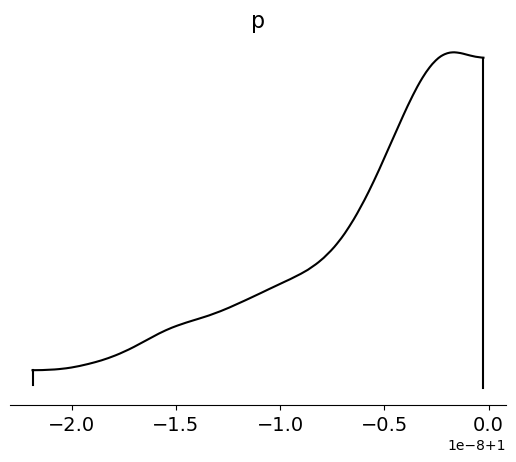

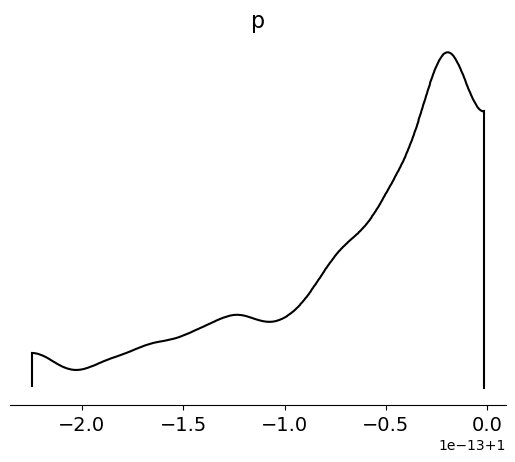

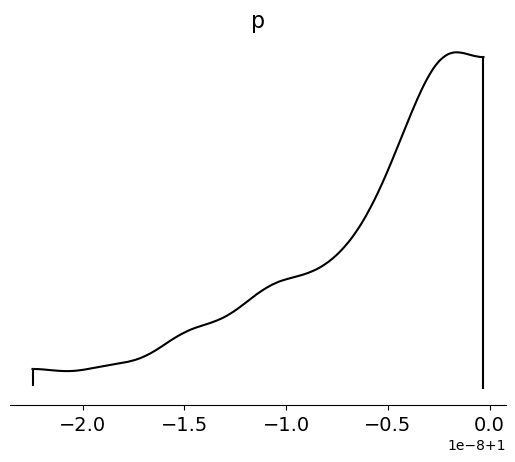

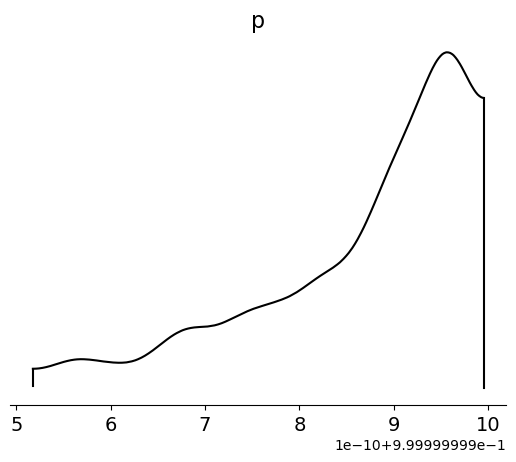

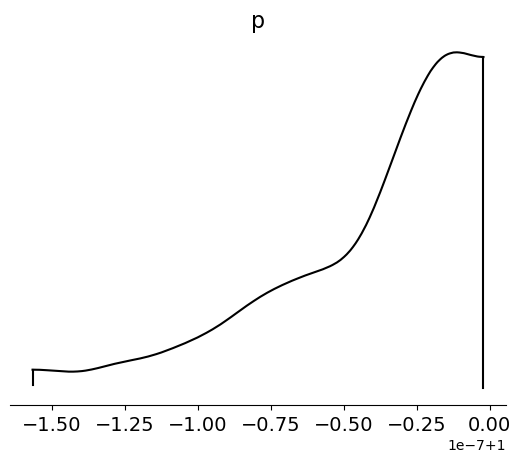

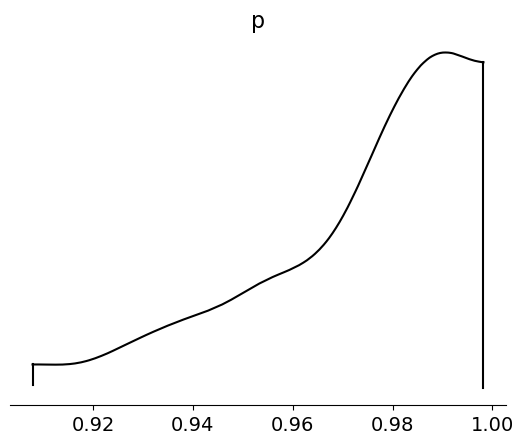

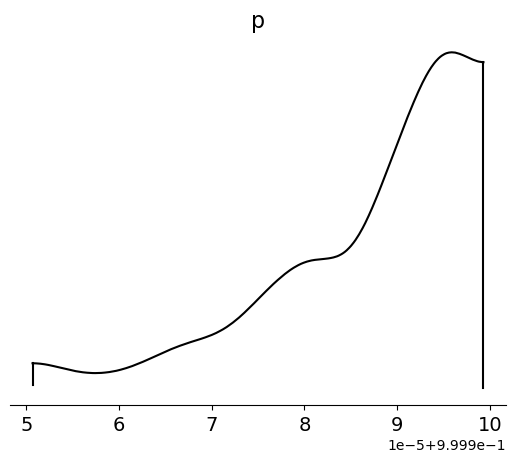

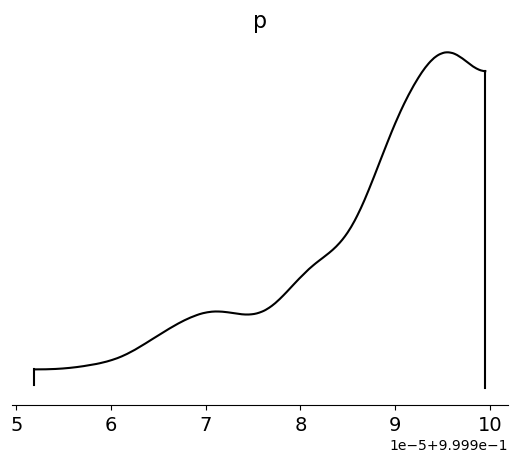

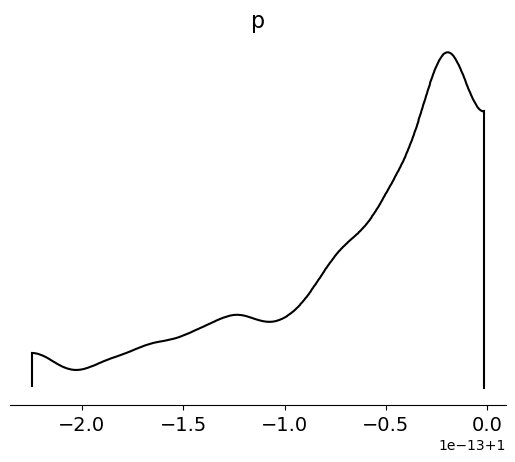

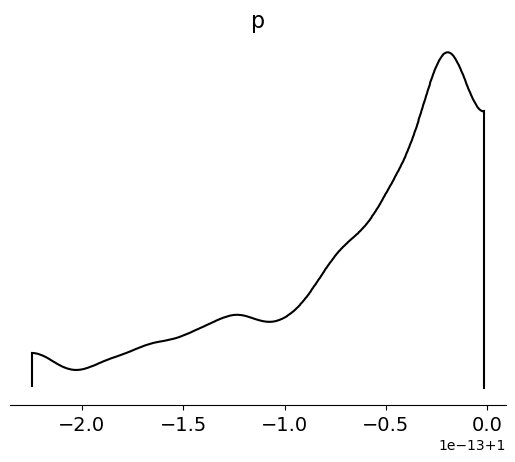

In [28]:
# Modelo solo con variables numéricas
persons = df_scaled["persons"].values
buying = df_scaled["buying"].values
safety = df_scaled["safety"].values
clase = df_scaled["class"].values
maint = df_scaled["maint"].values
lug_boot = df_scaled["lug_boot"].values

with pm.Model() as only_numeric:
    # Previas
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta_safety = pm.Normal("beta_safety", mu=11.522, sigma=1/4)    
    beta_buying = pm.Normal("beta_buying", mu=11.522, sigma=1/4)
    #beta_persons = pm.Normal("beta_persons", mu=2, sigma=0.8)   
    beta_maint = pm.Normal("beta_maint", mu=11.522, sigma=1/4)   
    #beta_lug_boot = pm.Normal("beta_lug_boot", mu=0, sigma=1)   

    # Regresión
    p = pm.Deterministic(
        "p",
        pm.math.invlogit(
            alpha
            #+ beta_persons * persons
            + beta_buying * buying
            + beta_safety * safety
            + beta_maint * maint
            #+ beta_lug_boot * lug_boot
        ),
    )
    # clase
    clase = pm.Bernoulli("clase", p=p, observed=clase)

# Simulación predictiva previa
with only_numeric:
    prior_predictive = pm.sample_prior_predictive()

# Generemos algunas de las densidades previas para algunos sujetos
for i in np.random.randint(0, df_scaled.shape[0], 10):
    az.plot_density(
        prior_predictive.prior["p"].sel(p_dim_0=i),
        colors=["k"],
        var_names="p",
        point_estimate=None,
    )

Las previas elegidas parecen hacer un buen trabajo, desde que vimos el histograma y las distribuciones de los datos podemos ver que existirá un sesgo en el modelo por el desbalanceo de clases. 

In [29]:
only_numeric.debug()

point={'alpha': array(0.), 'beta_safety': array(11.522), 'beta_buying': array(11.522), 'beta_maint': array(11.522)}

No problems found


In [30]:
# Objeto prior predictive
prior_predictive.prior["p"]

<xarray.DataArray 'p' (chain: 1, draw: 500, p_dim_0: 1728)> Size: 7MB
array([[[1.        , 1.        , 1.        , ..., 0.70128368,
         0.99864529, 0.99999568],
        [1.        , 1.        , 1.        , ..., 0.53543819,
         0.99730823, 0.9999916 ],
        [1.        , 1.        , 1.        , ..., 0.29777299,
         0.99270163, 0.99997708],
        ...,
        [1.        , 1.        , 1.        , ..., 0.74530825,
         0.99882357, 0.99999594],
        [1.        , 1.        , 1.        , ..., 0.20787576,
         0.98890701, 0.99996698],
        [1.        , 1.        , 1.        , ..., 0.73101145,
         0.99884331, 0.99999636]]])
Coordinates:
  * chain    (chain) int32 4B 0
  * draw     (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * p_dim_0  (p_dim_0) int32 7kB 0 1 2 3 4 5 6 ... 1722 1723 1724 1725 1726 1727

In [31]:
# Muestreo de la distribución posterior
with only_numeric:
    idata = pm.sample(100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_safety, beta_buying, beta_maint]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 41 seconds.
There were 200 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


array([<Axes: title={'center': 'beta_buying'}>,
       <Axes: title={'center': 'beta_safety'}>,
       <Axes: title={'center': 'beta_maint'}>], dtype=object)

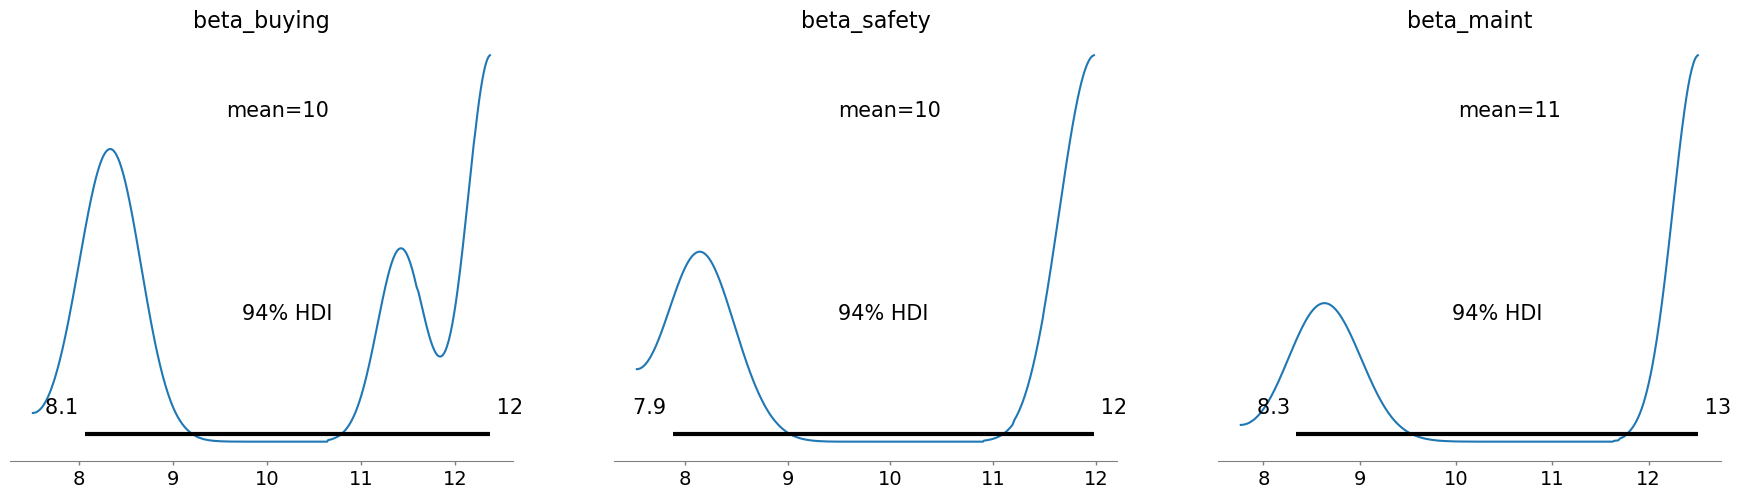

In [32]:
# az.plot_posterior
az.plot_posterior(
    idata,
    var_names=["beta_buying", "beta_safety", "beta_maint"],
)

<Axes: title={'center': 'alpha'}>

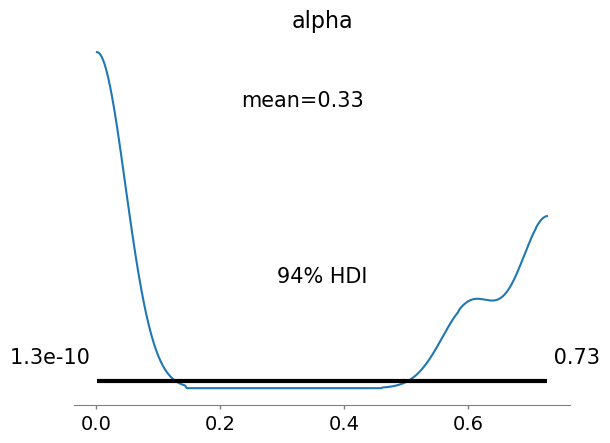

In [33]:
from scipy.special import expit as logistic


# Plot posterior
az.plot_posterior(
    idata,
    var_names=["alpha"],
    transform=logistic,
)

### Definición final del modelo mutable

In [34]:
# Partición de los datos en entrenamiento y prueba
X = df_scaled[["safety", "buying", "maint"]]
y = df_scaled["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


with pm.Model() as only_numeric_mutable:
    # Variables numéricas mutables
    buying = pm.MutableData("buying", X_train["buying"].values, dims="obs")
    safety = pm.MutableData("safety", X_train["safety"].values, dims="obs")
    maint = pm.MutableData("maint", X_train["maint"].values, dims="obs")
    clase_data = pm.MutableData("clase_data", y_train.values, dims="obs")
    
    # Previas
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta_safety = pm.Normal("beta_safety", mu=11.522, sigma=1/4)    
    beta_buying = pm.Normal("beta_buying", mu=11.522, sigma=1/4)
    #beta_persons = pm.Normal("beta_persons", mu=2, sigma=0.8)   
    beta_maint = pm.Normal("beta_maint", mu=11.522, sigma=1/4)   
    #beta_lug_boot = pm.Normal("beta_lug_boot", mu=0, sigma=1)   

    # Regresión
    p = pm.Deterministic(
        "p",
        pm.math.invlogit(
            alpha
            #+ beta_persons * persons
            + beta_buying * buying
            + beta_safety * safety
            + beta_maint * maint
            #+ beta_lug_boot * lug_boot
        ),
    )
    # clase
    clase = pm.Bernoulli("clase", p=p, observed=clase_data, dims="obs")

# Simulación predictiva previa
with only_numeric_mutable:
    idata = pm.sample(100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta_safety, beta_buying, beta_maint]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 40 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [35]:
X_train["buying"].values

array([1.        , 0.33333333, 0.        , ..., 0.66666667, 0.        ,
       0.33333333])

array([<Axes: title={'center': 'beta_buying'}>,
       <Axes: title={'center': 'beta_safety'}>,
       <Axes: title={'center': 'beta_maint'}>], dtype=object)

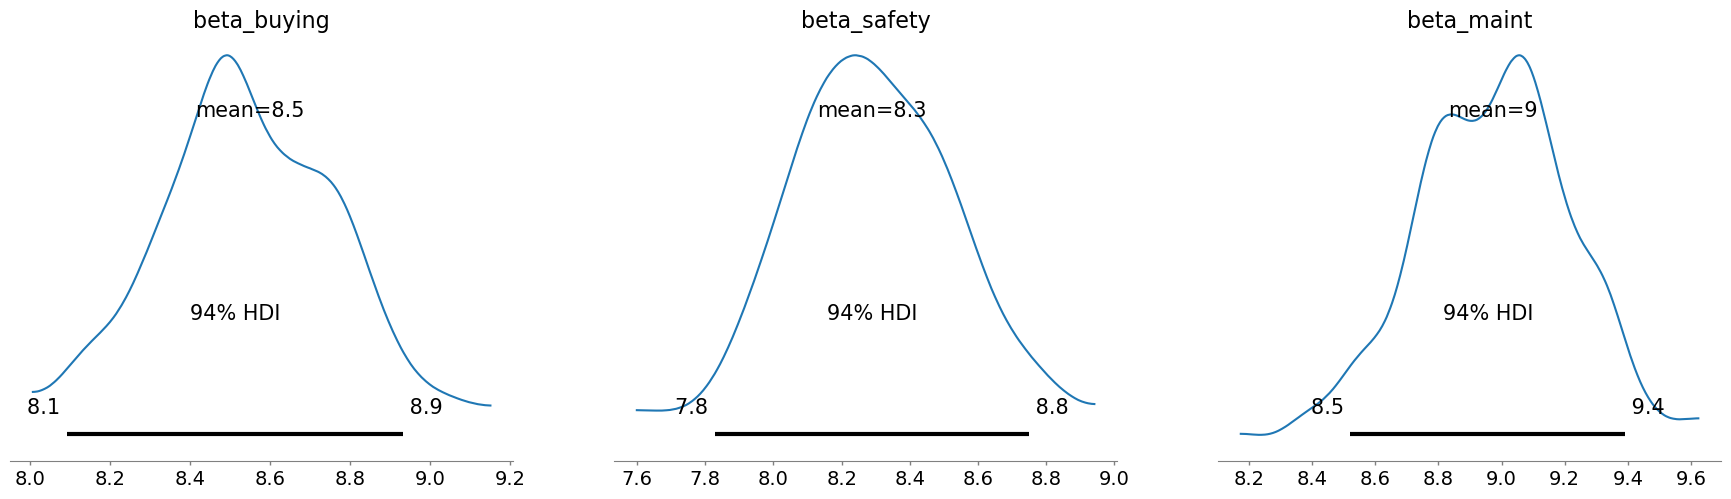

In [36]:
# az.plot_posterior
az.plot_posterior(idata, var_names=["beta_buying", "beta_safety", "beta_maint"])

Es importante recordar que el espacio en el que están estas $\beta$ s, es un espacio transformado por la transformación logística inversa.

Para $\alpha$, debido a que estandarizamos y encodeamos nuestras variables, sabemos que $\text{logit}(p) = \alpha$ es la probabilidad de que un carro con buying, safety y maint promedios sea muy bueno.

<Axes: title={'center': 'alpha'}>

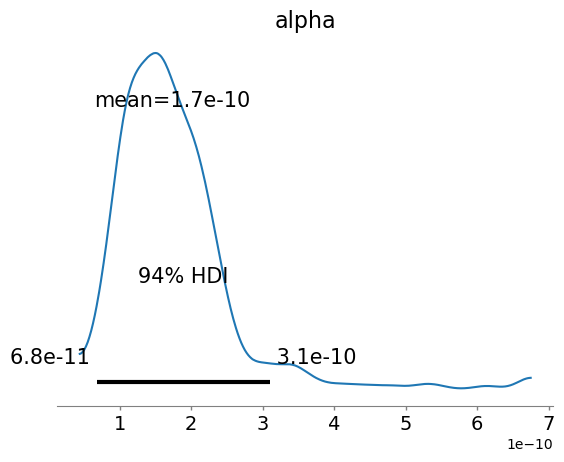

In [37]:
from scipy.special import expit as logistic
# Plot posterior
az.plot_posterior(
    idata,
    var_names=["alpha"],
    transform=logistic,
)

La probabilidad de alpha, de que un carro este en el promedio =$ 1.8x10^(-10) (cargado a inaceptable), esta entre 6.2x10^(-11) y 3x10^(-10).

## Evaluar el modelo

In [38]:
# Cambiamos los datos observados y muestreamos la distribución posterior predictiva
with only_numeric_mutable:
    pm.set_data(
        {
            "buying": X_test["buying"].values,
            "safety": X_test["safety"].values,
            "maint": X_test["maint"].values,
            "clase_data": y_test.values
        },
        coords={"idx": X_test.index}
    )

    idata.extend(pm.sample_posterior_predictive(idata))

Sampling: [clase]


In [39]:
# Tomamos promedio sobre las cadenas y las muestras
y_score = idata.posterior_predictive["clase"].mean(dim=["chain", "draw"])
y_score

<xarray.DataArray 'clase' (obs: 346)> Size: 3kB
array([0.0625, 0.    , 0.    , 0.    , 0.    , 0.    , 0.96  , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.0025, 0.5875, 0.    ,
       0.0125, 0.    , 0.    , 0.    , 0.0525, 0.    , 0.0075, 0.    ,
       0.05  , 0.    , 0.5725, 0.    , 0.    , 0.075 , 0.    , 0.    ,
       0.5025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.52  , 0.    , 0.    , 0.    , 0.03  , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0275, 0.    ,
       0.    , 0.    , 0.0025, 0.0775, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.285 ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.0025, 0.    , 0.    ,
       0.    , 0.0025, 0.    , 0.    , 0.    , 0.0075, 0.    , 0.    ,
       0.625 , 0.    , 0.    , 0.    , 0.3125, 0.965 , 0.    , 0.0025,
       0.    , 0.    , 0.    , 0.    , 0.0025, 0.    , 0.005 , 0.    ,
       0.5775, 0.0025, 0.    , 0.065 , 0.    , 0.    , 0.9725, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.605 , 0.    , 0.0125, 0.    , 0.    , 0.    , 0.09  ,
       0.005 , 0.    , 0.    , 0.    , 0.06  , 0.    , 0.0675, 0.    ,
       0.    , 0.    , 0.    , 0.57  , 0.    , 0.955 , 0.    , 0.    ,
       0.    , 0.    , 0.05  , 0.    , 0.    , 0.0675, 0.    , 0.9575,
...
       0.    , 0.0175, 0.    , 0.    , 0.    , 0.0825, 0.    , 0.    ,
       0.    , 0.03  , 0.0025, 0.    , 0.    , 0.    , 0.01  , 0.    ,
       0.    , 0.    , 0.005 , 0.    , 0.    , 0.005 , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.33  , 0.0175, 0.    ,
       0.    , 0.    , 0.005 , 0.    , 0.005 , 0.    , 0.0025, 0.005 ,
       0.0025, 0.    , 0.075 , 0.305 , 0.    , 0.55  , 0.005 , 0.5925,
       0.    , 0.    , 0.    , 0.015 , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.0025, 0.    , 0.5875, 0.    , 0.0025, 0.    ,
       0.    , 0.025 , 0.0025, 0.0025, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.02  , 0.    , 0.    , 0.    ,
       0.0025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0025,
       0.01  , 0.    , 0.0025, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.55  , 0.    , 0.615 , 0.    , 0.    ,
       0.0775, 0.0025, 0.    , 0.    , 0.    , 0.    , 0.    , 0.035 ,
       0.    , 0.0225, 0.    , 0.    , 0.    , 0.01  , 0.    , 0.    ,
       0.0025, 0.    , 0.0075, 0.    , 0.09  , 0.    , 0.    , 0.065 ,
       0.    , 0.    , 0.    , 0.    , 0.01  , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.005 , 0.    , 0.    , 0.585 ,
       0.96  , 0.0125, 0.    , 0.    , 0.2875, 0.26  , 0.    , 0.    ,
       0.9675, 0.    ])
Coordinates:
  * obs      (obs) int32 1kB 0 1 2 3 4 5 6 7 ... 338 339 340 341 342 343 344 345

In [40]:
from sklearn.metrics import precision_recall_curve, f1_score

In [41]:
import numpy as np

# Suponiendo que y_train es un pandas Series
y_train = y_train.astype(int)

# O si es un NumPy array
y_train = y_train.astype(np.int64)

# Suponiendo que y_test es un pandas Series
y_test = y_test.astype(int)

# O si es un NumPy array
y_test = y_test.astype(np.int64)

In [42]:
precision, recall, thresholds = precision_recall_curve(y_true=y_test, y_score=y_score)
pr_curve = pd.DataFrame({"precision": precision, "recall": recall, "thresholds": np.concatenate([[0], thresholds])})
pr_curve

,precision,recall,thresholds
0,0.031792,1.000000,0.0000
1,0.038835,0.363636,0.0000
2,0.048780,0.363636,0.0025
3,0.055556,0.363636,0.0050
4,0.044118,0.272727,0.0075
5,0.046875,0.272727,0.0100
6,0.050000,0.272727,0.0125
7,0.050847,0.272727,0.0150
8,0.052632,0.272727,0.0175
9,0.053571,0.272727,0.0200


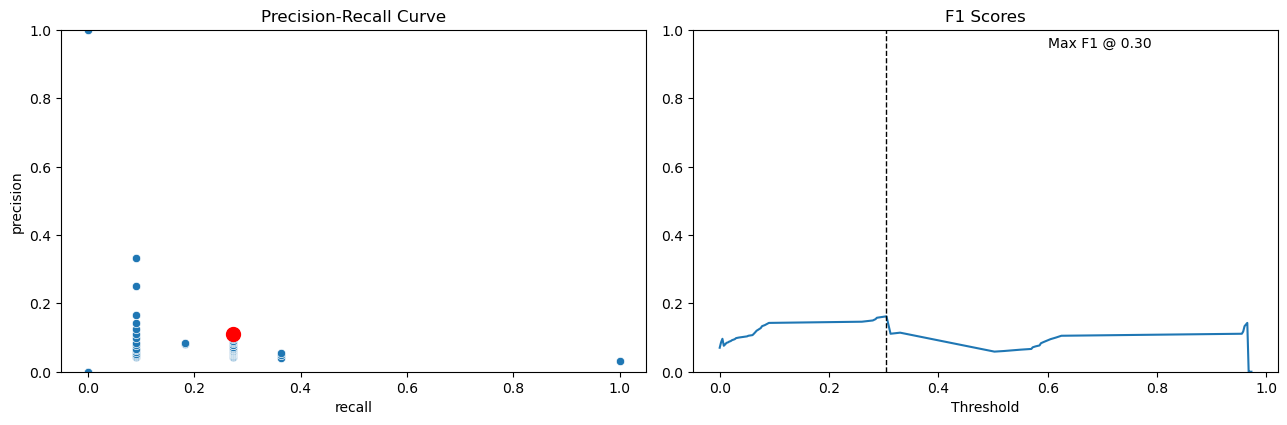

In [43]:
# Construimos la curva precision-recall

f1 = pd.Series({t: f1_score(y_true=y_test, y_pred=y_score > t) for t in thresholds})
# Encontramos el umbral que maximiza F1
best_threshold = f1.idxmax()
fig, axes = plt.subplots(ncols=2, figsize=(13, 5))

# Curva Precision-Recall, con el mejor umbral marcado
sns.scatterplot(x='recall', y='precision', data=pr_curve, ax=axes[0])
axes[0].plot(
    pr_curve.loc[np.where(thresholds == best_threshold)[0], 'recall'],
    pr_curve.loc[np.where(thresholds == best_threshold)[0], 'precision'],
    'ro',
    ms=10
)
axes[0].set_ylim(0,1)
axes[0].set_title('Precision-Recall Curve')

# Curva F1 vs. umbrales, con el mejor umbral marcado
f1.plot(ax=axes[1], title='F1 Scores', ylim=(0,1))
axes[1].set_xlabel('Threshold')
axes[1].axvline(best_threshold, lw=1, ls='--', color='k')
axes[1].text(x=.60, y=.95, s=f'Max F1 @ {best_threshold:.2f}')
fig.tight_layout()
plt.subplots_adjust(top=.8)
plt.show();

In [44]:
pr_curve[pr_curve["thresholds"] == best_threshold]


,precision,recall,thresholds
30,0.115385,0.272727,0.305


In [45]:
# Accuracy
accuracy = (y_test == (y_score > best_threshold)).mean()
accuracy

0.9104046242774566

### Conclusión

La evaluación en presición-recall y en F1 fue muy mala, considerando que la gráfica de recall a cureve literalmente no muestra una curva si no una distribucióm discreta y tanto esa como la F1 Scores no se logró llegar a más de 0.5. En F1 Score sacabos 0.30. El único que nos dio muy buenos resultados fue el acuraccy, con 91 % de acertividad. 